1 <class 'dict'>
Text(-0.575, 0.175, 'haha')
Text(-0.575, 0.175, 'haha')
Text(-0.575, 0.175, 'haha')
2 <class 'dict'>
Text(-0.575, 0.175, 'haha')
Text(-0.575, 0.175, 'haha')
Text(-0.575, 0.175, 'haha')
3 <class 'dict'>
Text(-0.575, 0.175, 'haha')
Text(-0.575, 0.175, 'haha')
Text(-0.575, 0.175, 'haha')
4 <class 'dict'>
Text(-0.575, 0.175, 'haha')
Text(-0.575, 0.175, 'haha')
Text(-0.575, 0.175, 'haha')


/Users/joerivest/miniconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  fig.canvas.print_figure(bytes_io, **kw)


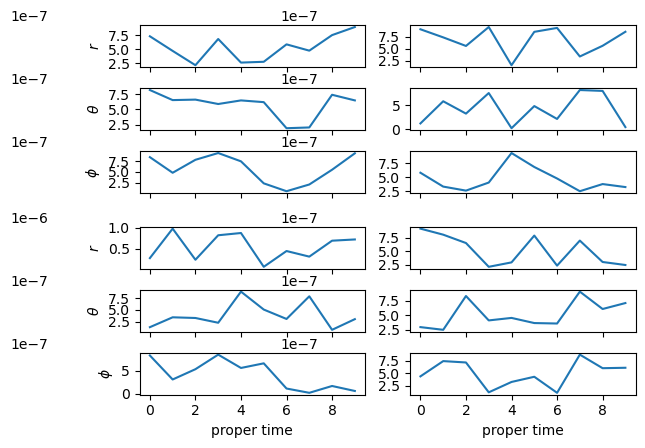

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

def plot_nested_subplots(data_dict,*plot_args):#,traj=True,strain=False): # for now, only trajectories # first entry must be a shared time array to serve as x-axis. y-arrays must be in sub-dictionaries
    x=data_dict['t']
    num_plots = len(data_dict)
    orows = 2 # 3 #int(np.ceil(num_plots ** 0.5))
    ocols = 2 #int(np.ceil(num_plots / rows))
    # if traj: 
    #     num_plots+=4
    #     rows+=2
    #     cols+=2
    # if strain: 
    #     num_plots+=1
    #     rows+=1
    
    dict_fig = plt.figure(constrained_layout=True)
    outer = gridspec.GridSpec(orows, ocols, wspace=0.2, hspace=0.2)
    #gs = dict_fig.add_gridspec(rows, cols)

    for i, (okey, inner_dict) in enumerate(data_dict.items()):
        # if i>0: 
        if isinstance(inner_dict,dict):
            print(i,type(inner_dict))
            # srows = len(inner_dict)
            # scols = 1
            # sgs = dict_fig.add_gridspec(rows, cols)
            
            # ax = dict_fig.add_subplot(gs[i // cols, i % cols])
            # ax.plot(values)
            # ax.set_title(okey)
            inner = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=outer[i-1],
                                         wspace=0.1, hspace=0.5)
            # irow     = 0
            icol     = 0
            # maxiRow  = 3
            # maxCol  = 2
            
        
            for j, (ikey, values) in enumerate(inner_dict.items()):
                ax = plt.Subplot(dict_fig, inner[j,icol])
                ax.plot(x,values*1e-6)
                #t= ax.text(0.5,0.5, 'outer=%d\nrow=%d\ncol=%d' % (i,row,col))
                if i>2 and j==len(inner_dict)-1: ax.set_xlabel('proper time')
                else: ax.set_xticklabels([])
                # ax.set_yticks([])
                if i%2!=0:
                    if j==0: ax.set_ylabel('$r$')
                    else: 
                        ylabel='$\\'+ikey+'$'
                        ax.set_ylabel(ylabel)
                ax.get_yaxis().get_offset_text().set_x(-0.575)# only this one does anything
                ax.get_yaxis().get_offset_text().set_y(0.175)
                ax.get_yaxis().get_offset_text().set_text('haha')
                print(ax.get_yaxis().get_offset_text())
                #t.set_ha('center')
                # if i%2==0:
                #     hj
                # if i == num_plots
                dict_fig.add_subplot(ax)
                # col += 1
                # if col == maxCol:
                    # col = 0
                    # row += 1
    plt.show()

data = {
        't':np.arange(10),
        'pos':{
            'r':np.random.rand(10),
            'theta':np.random.rand(10),
            'phi':np.random.rand(10)
            },
        'vel': {
            'r':np.random.rand(10),
            'theta':np.random.rand(10),
            'phi':np.random.rand(10)
            },
        'acc':{
            'r':np.random.rand(10),
            'theta':np.random.rand(10),
            'phi':np.random.rand(10)
            },
        'jerk':{
            'r':np.random.rand(10),
            'theta':np.random.rand(10),
            'phi':np.random.rand(10)
            },
        # 'strain':
        # {
            'hplus':np.random.rand(10),
            'hcross':np.random.rand(10)
        # }
    }

plot_nested_subplots(data)